In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.23.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
bayesian-optimization 2.0.3 requires numpy>=1.25, but you have numpy 1.23.4 which is incompatible.
bigframes 1.29.0 requires numpy>=1.24.0, but you have numpy 1.23.4 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.4 which is incompatible.
featuretools 1.31.0 requires numpy>=1.25.0, but you have numpy 1.23.4 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you hav

In [4]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

tf.random.set_seed(42)
np.random.seed(42)


In [5]:
train_path = ("/kaggle/input/brain-tumor-mri-dataset/Training")
val_path = ("/kaggle/input/brain-tumor-mri-dataset/Testing")

In [6]:
batch_size = 32
img_height = 128 
img_width = 128 
no_of_clases = 4
clsses_name = ['glioma', 'meningioma', 'notumor', 'pituitary']
input_shape = (img_height, img_width, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
print('train classes')
print(train_generator.class_indices)
print('validation classes')
print(validation_generator.class_indices)

train classes
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
validation classes
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [9]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(no_of_clases, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 60s 297ms/step - accuracy: 0.4098 - loss: 1.2297 - val_accuracy: 0.3860 - val_loss: 2.4054
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.6579 - loss: 0.8370 - val_accuracy: 0.4752 - val_loss: 1.8132
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.7093 - loss: 0.7450 - val_accuracy: 0.5919 - val_loss: 1.1701
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 173ms/step - accuracy: 0.7488 - loss: 0.6530 - val_accuracy: 0.5820 - val_loss: 1.2793
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.7608 - loss: 0.6000 - val_accuracy: 0.5477 - val_loss: 1.4407
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [12]:
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print('Validation accuracy:', accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5726 - loss: 1.3180
Validation accuracy: 0.5476735234260559


In [13]:
# Classification Report and Confusion Matrix
y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())

print('\nClassification Report:\n', classification_report(y_true, y_pred_classes, target_names=class_names))

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step

Classification Report:
               precision    recall  f1-score   support

      glioma       0.74      0.60      0.66       300
  meningioma       0.63      0.27      0.38       306
     notumor       0.46      0.99      0.63       405
   pituitary       0.77      0.18      0.29       300

    accuracy                           0.55      1311
   macro avg       0.65      0.51      0.49      1311
weighted avg       0.64      0.55      0.50      1311



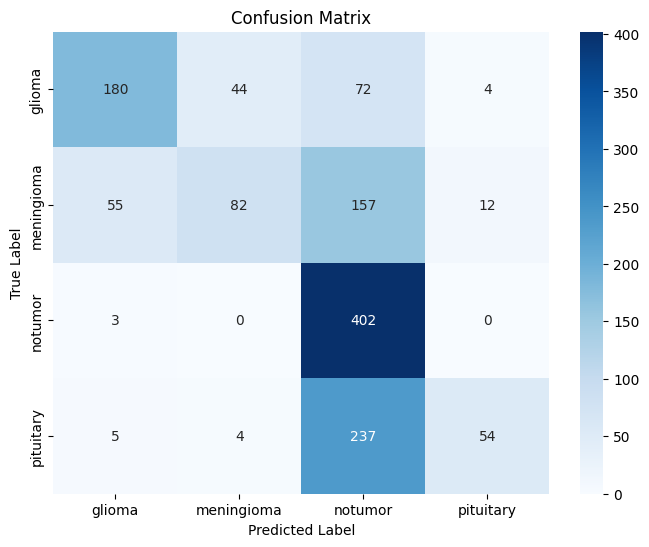

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()